## IS 362 Final Project

Project: To review the all-time top budget Hollywood movies and see how it compares to the audience rating on IMDB and the critical rating on Rotten Tomatoes. Does a higher budget translate into a better critical score?

In [1]:
#import modules

import pandas as pd
import numpy as np
import sqlite3
import csv
import seaborn as sns
import matplotlib.pyplot as pyplot

# change settings to show all rows in tables
pd.set_option('display.max_rows', None)

### Web Data from Wikipedia
First we'll need to grab the html tables from the relevant wikipedia page

In [2]:
wiki_read = pd.read_html('https://en.wikipedia.org/wiki/List_of_most_expensive_films')

Let's see how many tables were downloaded from the wiki page:

In [3]:
len(wiki_read)

7

There were seven tables in that page. Let's look at them:

In [4]:
wiki_read

[    Rank                                             Title  Year  \
 0      1       Pirates of the Caribbean: On Stranger Tides  2011   
 1      2                           Avengers: Age of Ultron  2015   
 2      3                                 Avengers: Endgame  2019   
 3      4                            Avengers: Infinity War  2018   
 4      5          Pirates of the Caribbean: At World's End  2007   
 5      5                                    Justice League  2017   
 6      7                           Solo: A Star Wars Story  2018   
 7      8                                       John Carter  2012   
 8      9                Batman v Superman: Dawn of Justice  2016   
 9     10                          Star Wars: The Last Jedi  2017   
 10    11                                           Tangled  2010   
 11    12                      Star Wars: The Force Awakens  2015   
 12    13                                      Spider-Man 3  2007   
 13    14                         

The table that we're looking for ("Most expensive films (adjusted for inflation)") is the third one:

In [5]:
wiki_read[2]

Rank                                              Title  Year  \
    Rank                                              Title  Year   
0    1.0        Pirates of the Caribbean: On Stranger Tides  2011   
1    2.0                            Avengers: Age of Ultron  2015   
2    3.0           Pirates of the Caribbean: At World's End  2007   
3    4.0                                  Avengers: Endgame  2019   
4    5.0                             Avengers: Infinity War  2018   
5    6.0                                            Titanic  1997   
6    6.0                                       Spider-Man 3  2007   
7    8.0                                     Justice League  2017   
8    9.0                                            Tangled  2010   
9   10.0             Harry Potter and the Half-Blood Prince  2009   
10  11.0                                        John Carter  2012   
11  12.0                                         Waterworld  1995   
12  13.0         Pirates of the Caribbean: Dead Man's Chest  2006   
13  14.0                                             Avatar  2009   
14  15.0                 Batman v Superman: Dawn of Justice  2016   
15  15.0                            Solo: A Star Wars Story  2018   
16  17.0                       Star Wars: The Force Awakens  2015   
17  18.0                           Star Wars: The Last Jedi  2017   
18  19.0                                          King Kong  2005   
19  20.0                                       Spider-Man 2  2004   
20  21.0           The Chronicles of Narnia: Prince Caspian  2008   
21  22.0                              X-Men: The Last Stand  2006   
22  22.0                               Beauty and the Beast  2017   
23  24.0                                     Wild Wild West  1999   
24  25.0                                          Cleopatra  1963   
25  26.0                                   Superman Returns  2006   
26  27.0                              The Dark Knight Rises  2012   
27  28.0                                      The Lion King  2019   
28  29.0                      Transformers: The Last Knight  2017   
29  30.0                                            Spectre  2015   
30  31.0                                    The Lone Ranger  2013   
31  31.0                                       Man of Steel  2013   
32  33.0                                       The Avengers  2012   
33  33.0                         Captain America: Civil War  2016   
34  35.0                                         Maleficent  2014   
35  36.0                            The Fate of the Furious  2017   
36  36.0   Pirates of the Caribbean: Dead Men Tell No Tales  2017   
37  36.0                                     Men in Black 3  2012   
38  39.0                Transformers: Revenge of the Fallen  2009   
39  39.0                                               2012  2009   
40  39.0                               Terminator Salvation  2009   
41  42.0                The Hobbit: The Desolation of Smaug  2013   
42  42.0                                  Quantum of Solace  2008   
43  44.0                                               Troy  2004   
44  45.0                          Oz the Great and Powerful  2013   
45  45.0  The Chronicles of Narnia: The Lion, the Witch ...  2005   
46  47.0                                        Toy Story 3  2010   
47  47.0                                          Rogue One  2016   
48  49.0                                         Battleship  2012   
49  49.0                 Terminator 3: Rise of the Machines  2003   
50  51.0                                      Green Lantern  2011   
51  51.0                                             Cars 2  2011   
52  53.0                    Transformers: Age of Extinction  2014   
53  54.0                     Dawn of the Planet of the Apes  2014   
54  54.0          The Hobbit: The Battle of the Five Armies  2014   
55  56.0                             The Amazing Spider-Man  2012   
56

### Data from IMDB and Rotten Tomatoes
The IMDB and Rotten Tomatoes ratings data is stored in separate CSV files. Let's build a SQL database to be able to merge the data:

In [6]:
conn = sqlite3.connect('movies.db')
c = conn.cursor()
# Create the table of pitches
c.execute("""CREATE TABLE IF NOT EXISTS imdb (
            title text,
            imdb int
            )""")

conn.commit()

Import the IMDB Data

In [7]:
df = pd.read_csv('imdb.csv')
df.to_sql('imdb', conn, if_exists='append', index=False)

In [8]:
imdbquery = '''SELECT * FROM imdb'''

In [9]:
pd.read_sql_query(imdbquery, con=conn)

,title,imdb
0,Pirates of the Caribbean: On Stranger Tides,6.6
1,Avengers: Age of Ultron,7.3
2,Pirates of the Caribbean: At World's End,7.1
3,Avengers: Endgame,8.5
4,Avengers: Infinity War,8.5
5,Titanic,7.8
6,Spider-Man 3,6.2
7,Justice League,6.4
8,Tangled,7.7
9,Harry Potter and the Half-Blood Prince,7.6


Import the Rotten Tomatoes data:

In [10]:
c.execute("""CREATE TABLE IF NOT EXISTS rt (
            title text,
            rt int
            )""")

conn.commit()

In [11]:
df2 = pd.read_csv('rt.csv')
df2.to_sql('rt', conn, if_exists='append', index=False)

In [12]:
rtquery = '''SELECT * FROM rt'''

In [13]:
pd.read_sql_query(rtquery, con=conn)

,title,rt
0,Pirates of the Caribbean: On Stranger Tides,0.33
1,Avengers: Age of Ultron,0.75
2,Pirates of the Caribbean: At World's End,0.44
3,Avengers: Endgame,0.94
4,Avengers: Infinity War,0.85
5,Titanic,0.89
6,Spider-Man 3,0.63
7,Justice League,0.40
8,Tangled,0.89
9,Harry Potter and the Half-Blood Prince,0.83


Merging the IMDB and Rotten Tomatoes tables in SQL:

In [14]:
joinquery = '''SELECT distinct imdb.title, imdb.imdb, rt.rt FROM imdb INNER JOIN rt ON imdb.title = rt.title
'''

In [15]:
sql_joined = pd.read_sql_query(joinquery, con=conn)
sql_joined

,title,imdb,rt
0,Pirates of the Caribbean: On Stranger Tides,6.6,0.33
1,Avengers: Age of Ultron,7.3,0.75
2,Pirates of the Caribbean: At World's End,7.1,0.44
3,Avengers: Endgame,8.5,0.94
4,Avengers: Infinity War,8.5,0.85
5,Titanic,7.8,0.89
6,Spider-Man 3,6.2,0.63
7,Justice League,6.4,0.40
8,Tangled,7.7,0.89
9,Harry Potter and the Half-Blood Prince,7.6,0.83


Creating a new list to store just the table from Wikipedia that we are interested in:

In [16]:
wiki = pd.DataFrame(wiki_read[2]) 
wiki

Rank                                              Title  Year  \
    Rank                                              Title  Year   
0    1.0        Pirates of the Caribbean: On Stranger Tides  2011   
1    2.0                            Avengers: Age of Ultron  2015   
2    3.0           Pirates of the Caribbean: At World's End  2007   
3    4.0                                  Avengers: Endgame  2019   
4    5.0                             Avengers: Infinity War  2018   
5    6.0                                            Titanic  1997   
6    6.0                                       Spider-Man 3  2007   
7    8.0                                     Justice League  2017   
8    9.0                                            Tangled  2010   
9   10.0             Harry Potter and the Half-Blood Prince  2009   
10  11.0                                        John Carter  2012   
11  12.0                                         Waterworld  1995   
12  13.0         Pirates of the Caribbean: Dead Man's Chest  2006   
13  14.0                                             Avatar  2009   
14  15.0                 Batman v Superman: Dawn of Justice  2016   
15  15.0                            Solo: A Star Wars Story  2018   
16  17.0                       Star Wars: The Force Awakens  2015   
17  18.0                           Star Wars: The Last Jedi  2017   
18  19.0                                          King Kong  2005   
19  20.0                                       Spider-Man 2  2004   
20  21.0           The Chronicles of Narnia: Prince Caspian  2008   
21  22.0                              X-Men: The Last Stand  2006   
22  22.0                               Beauty and the Beast  2017   
23  24.0                                     Wild Wild West  1999   
24  25.0                                          Cleopatra  1963   
25  26.0                                   Superman Returns  2006   
26  27.0                              The Dark Knight Rises  2012   
27  28.0                                      The Lion King  2019   
28  29.0                      Transformers: The Last Knight  2017   
29  30.0                                            Spectre  2015   
30  31.0                                    The Lone Ranger  2013   
31  31.0                                       Man of Steel  2013   
32  33.0                                       The Avengers  2012   
33  33.0                         Captain America: Civil War  2016   
34  35.0                                         Maleficent  2014   
35  36.0                            The Fate of the Furious  2017   
36  36.0   Pirates of the Caribbean: Dead Men Tell No Tales  2017   
37  36.0                                     Men in Black 3  2012   
38  39.0                Transformers: Revenge of the Fallen  2009   
39  39.0                                               2012  2009   
40  39.0                               Terminator Salvation  2009   
41  42.0                The Hobbit: The Desolation of Smaug  2013   
42  42.0                                  Quantum of Solace  2008   
43  44.0                                               Troy  2004   
44  45.0                          Oz the Great and Powerful  2013   
45  45.0  The Chronicles of Narnia: The Lion, the Witch ...  2005   
46  47.0                                        Toy Story 3  2010   
47  47.0                                          Rogue One  2016   
48  49.0                                         Battleship  2012   
49  49.0                 Terminator 3: Rise of the Machines  2003   
50  51.0                                      Green Lantern  2011   
51  51.0                                             Cars 2  2011   
52  53.0                    Transformers: Age of Extinction  2014   
53  54.0                     Dawn of the Planet of the Apes  2014   
54  54.0          The Hobbit: The Battle of the Five Armies  2014   
55  56.0                             The Amazing Spider-Man  2012   
56

Now we can join the information from both the SQL table and the list from Wikipedia:

In [17]:
intermediate = pd.concat([wiki, sql_joined], axis=1, ignore_index=True)
intermediate

,0,1,2,3,4,5,6,7,8
0,1.0,Pirates of the Caribbean: On Stranger Tides,2011,$422,*$378.5,[1][nb 1],Pirates of the Caribbean: On Stranger Tides,6.6,0.33
1,2.0,Avengers: Age of Ultron,2015,$386,*$365,[2][nb 2],Avengers: Age of Ultron,7.3,0.75
2,3.0,Pirates of the Caribbean: At World's End,2007,$362,$300,[5][6][nb 4],Pirates of the Caribbean: At World's End,7.1,0.44
3,4.0,Avengers: Endgame,2019,$356,$356,[3],Avengers: Endgame,8.5,0.94
4,5.0,Avengers: Infinity War,2018,$316,$316,[4][nb 3],Avengers: Infinity War,8.5,0.85
5,6.0,Titanic,1997,$312,*$200,[52][53][54],Titanic,7.8,0.89
6,6.0,Spider-Man 3,2007,$312,*$258,[18],Spider-Man 3,6.2,0.63
7,8.0,Justice League,2017,$307,$300,[7][8][9],Justice League,6.4,0.40
8,9.0,Tangled,2010,$299,$260,[14][15][16][17],Tangled,7.7,0.89
9,10.0,Harry Potter and the Half-Blood Prince,2009,$292,$250,[20][21],Harry Potter and the Half-Blood Prince,7.6,0.83


Now we'll make a final list with just the columns that we want:

In [18]:
final = intermediate[[1,2,3,4,7,8]]
final.columns = ['name','year','adj_cost','nominal_cost','imdb','rt']

final

,name,year,adj_cost,nominal_cost,imdb,rt
0,Pirates of the Caribbean: On Stranger Tides,2011,$422,*$378.5,6.6,0.33
1,Avengers: Age of Ultron,2015,$386,*$365,7.3,0.75
2,Pirates of the Caribbean: At World's End,2007,$362,$300,7.1,0.44
3,Avengers: Endgame,2019,$356,$356,8.5,0.94
4,Avengers: Infinity War,2018,$316,$316,8.5,0.85
5,Titanic,1997,$312,*$200,7.8,0.89
6,Spider-Man 3,2007,$312,*$258,6.2,0.63
7,Justice League,2017,$307,$300,6.4,0.40
8,Tangled,2010,$299,$260,7.7,0.89
9,Harry Potter and the Half-Blood Prince,2009,$292,$250,7.6,0.83


### Data Cleanup
There's some characters in the money amounts that we'll have to clean up:

In [19]:
# removing asterisks from money columns
final.replace(regex=True,inplace=True,to_replace=r'\*',value=r'')
final

C:\Users\grivera\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,name,year,adj_cost,nominal_cost,imdb,rt
0,Pirates of the Caribbean: On Stranger Tides,2011,$422,$378.5,6.6,0.33
1,Avengers: Age of Ultron,2015,$386,$365,7.3,0.75
2,Pirates of the Caribbean: At World's End,2007,$362,$300,7.1,0.44
3,Avengers: Endgame,2019,$356,$356,8.5,0.94
4,Avengers: Infinity War,2018,$316,$316,8.5,0.85
5,Titanic,1997,$312,$200,7.8,0.89
6,Spider-Man 3,2007,$312,$258,6.2,0.63
7,Justice League,2017,$307,$300,6.4,0.40
8,Tangled,2010,$299,$260,7.7,0.89
9,Harry Potter and the Half-Blood Prince,2009,$292,$250,7.6,0.83


In [20]:
# removing dollar signs from money columns
final.replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
final

,name,year,adj_cost,nominal_cost,imdb,rt
0,Pirates of the Caribbean: On Stranger Tides,2011,422,378.5,6.6,0.33
1,Avengers: Age of Ultron,2015,386,365,7.3,0.75
2,Pirates of the Caribbean: At World's End,2007,362,300,7.1,0.44
3,Avengers: Endgame,2019,356,356,8.5,0.94
4,Avengers: Infinity War,2018,316,316,8.5,0.85
5,Titanic,1997,312,200,7.8,0.89
6,Spider-Man 3,2007,312,258,6.2,0.63
7,Justice League,2017,307,300,6.4,0.40
8,Tangled,2010,299,260,7.7,0.89
9,Harry Potter and the Half-Blood Prince,2009,292,250,7.6,0.83


In [21]:
# There are some extra characters in the budget amount for the Superman film that should be removed
final.replace(regex=True,inplace=True,to_replace=r'–213',value=r'')
final

,name,year,adj_cost,nominal_cost,imdb,rt
0,Pirates of the Caribbean: On Stranger Tides,2011,422,378.5,6.6,0.33
1,Avengers: Age of Ultron,2015,386,365,7.3,0.75
2,Pirates of the Caribbean: At World's End,2007,362,300,7.1,0.44
3,Avengers: Endgame,2019,356,356,8.5,0.94
4,Avengers: Infinity War,2018,316,316,8.5,0.85
5,Titanic,1997,312,200,7.8,0.89
6,Spider-Man 3,2007,312,258,6.2,0.63
7,Justice League,2017,307,300,6.4,0.40
8,Tangled,2010,299,260,7.7,0.89
9,Harry Potter and the Half-Blood Prince,2009,292,250,7.6,0.83


In [22]:
# Saving to a CSV file to clean up the data types and make sure the indexes are correct
final.to_csv('transition.csv',index=False)

In [23]:
# Load the CSV file
final = pd.read_csv('transition.csv')

In [24]:
# Checking table
final

,name,year,adj_cost,nominal_cost,imdb,rt
0,Pirates of the Caribbean: On Stranger Tides,2011,422,378.5,6.6,0.33
1,Avengers: Age of Ultron,2015,386,365.0,7.3,0.75
2,Pirates of the Caribbean: At World's End,2007,362,300.0,7.1,0.44
3,Avengers: Endgame,2019,356,356.0,8.5,0.94
4,Avengers: Infinity War,2018,316,316.0,8.5,0.85
5,Titanic,1997,312,200.0,7.8,0.89
6,Spider-Man 3,2007,312,258.0,6.2,0.63
7,Justice League,2017,307,300.0,6.4,0.40
8,Tangled,2010,299,260.0,7.7,0.89
9,Harry Potter and the Half-Blood Prince,2009,292,250.0,7.6,0.83


## Reviewing Results

We can see that for IMDB ratings, there are lots of movies in the 200-250 million dollar budget that have ratings of 6 or above. Spending 1.5x (300 mil) doesn't mean that there will be an appreciable increase in audience ratings.

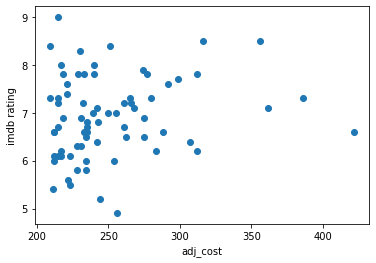

In [25]:
pyplot.scatter(final.adj_cost, final.imdb)
pyplot.xlabel('adj_cost')
pyplot.ylabel('imdb rating')
pyplot.show()

Looking at Rotten Tomatoes, we can also see that lots of movies around the 200-250 million budget mark are getting high critical scores, and increasing the budget is not a guarantee of high scores:

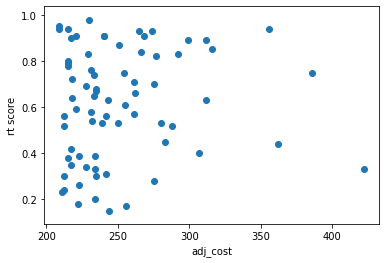

In [26]:
pyplot.scatter(final.adj_cost, final.rt)
pyplot.xlabel('adj_cost')
pyplot.ylabel('rt score')
pyplot.show()

Now we'll want to reflow the data to see how budgets have grown over time:

In [27]:
lineyear = final[['year','adj_cost']]
lineyear

,year,adj_cost
0,2011,422
1,2015,386
2,2007,362
3,2019,356
4,2018,316
5,1997,312
6,2007,312
7,2017,307
8,2010,299
9,2009,292


In [28]:
lineyear.dtypes

year        int64
adj_cost    int64
dtype: object

In [29]:
lineyear = lineyear.groupby('year', as_index=False).sum()
lineyear

,year,adj_cost
0,1963,255
1,1978,209
2,1995,283
3,1997,312
4,1998,215
5,1999,256
6,2003,228
7,2004,921
8,2005,497
9,2006,795


We can see below that the amount spent on the highest budgeted movies by Hollywood is increasing over time.

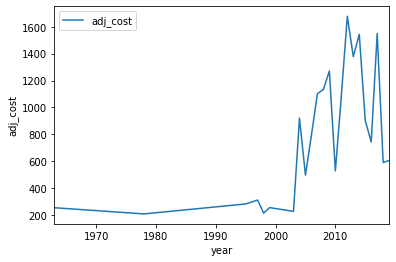

In [30]:
lineyear.plot.line(x = 'year', y = 'adj_cost')
pyplot.xlabel('year')
pyplot.ylabel('adj_cost')
pyplot.show()

Now we'll want to make a table to make the IMDB and Rotten Tomatoes scores on the same scale to make a better apples-to-apples comparison:

In [31]:
normalized_temp = final

In [32]:
normalized_temp['imdb_norm'] = df['imdb']*0.1
normalized_temp

,name,year,adj_cost,nominal_cost,imdb,rt,imdb_norm
0,Pirates of the Caribbean: On Stranger Tides,2011,422,378.5,6.6,0.33,0.66
1,Avengers: Age of Ultron,2015,386,365.0,7.3,0.75,0.73
2,Pirates of the Caribbean: At World's End,2007,362,300.0,7.1,0.44,0.71
3,Avengers: Endgame,2019,356,356.0,8.5,0.94,0.85
4,Avengers: Infinity War,2018,316,316.0,8.5,0.85,0.85
5,Titanic,1997,312,200.0,7.8,0.89,0.78
6,Spider-Man 3,2007,312,258.0,6.2,0.63,0.62
7,Justice League,2017,307,300.0,6.4,0.40,0.64
8,Tangled,2010,299,260.0,7.7,0.89,0.77
9,Harry Potter and the Half-Blood Prince,2009,292,250.0,7.6,0.83,0.76


In [33]:
'''normalized_temp['adj_cost_grouped'] = [220 if x < 221 
                                       elif x < 241 240
                                       else 0 for x in normalized_temp['adj_cost']]
normalized_temp
'''


def func(row):
    if row['adj_cost'] < 221 :        return 220
    elif row['adj_cost'] <241 :        return 240
    elif row['adj_cost'] <261 :        return 260
    elif row['adj_cost'] <281 :        return 280
    elif row['adj_cost'] <301 :        return 300
    elif row['adj_cost'] <321 :        return 320
    elif row['adj_cost'] <341 :        return 340
    elif row['adj_cost'] <361 :        return 360
    elif row['adj_cost'] <381 :        return 380
    elif row['adj_cost'] <401 :        return 400
    elif row['adj_cost'] <421 :        return 420
    elif row['adj_cost'] <441 :        return 440
    else:
        return 0

normalized_temp['adj_cost_grouped'] = normalized_temp.apply(func, axis=1)
normalized_temp

,name,year,adj_cost,nominal_cost,imdb,rt,imdb_norm,adj_cost_grouped
0,Pirates of the Caribbean: On Stranger Tides,2011,422,378.5,6.6,0.33,0.66,440
1,Avengers: Age of Ultron,2015,386,365.0,7.3,0.75,0.73,400
2,Pirates of the Caribbean: At World's End,2007,362,300.0,7.1,0.44,0.71,380
3,Avengers: Endgame,2019,356,356.0,8.5,0.94,0.85,360
4,Avengers: Infinity War,2018,316,316.0,8.5,0.85,0.85,320
5,Titanic,1997,312,200.0,7.8,0.89,0.78,320
6,Spider-Man 3,2007,312,258.0,6.2,0.63,0.62,320
7,Justice League,2017,307,300.0,6.4,0.40,0.64,320
8,Tangled,2010,299,260.0,7.7,0.89,0.77,300
9,Harry Potter and the Half-Blood Prince,2009,292,250.0,7.6,0.83,0.76,300


In [34]:
normalized_temp2 = normalized_temp[['adj_cost_grouped','imdb_norm','rt']]
normalized_temp2

,adj_cost_grouped,imdb_norm,rt
0,440,0.66,0.33
1,400,0.73,0.75
2,380,0.71,0.44
3,360,0.85,0.94
4,320,0.85,0.85
5,320,0.78,0.89
6,320,0.62,0.63
7,320,0.64,0.40
8,300,0.77,0.89
9,300,0.76,0.83


Here is a table with the ratings averaged for each budget category (in 20 million increments):

In [35]:
normalized_temp3 = normalized_temp2.groupby('adj_cost_grouped', as_index=False).mean()
normalized_temp3

,adj_cost_grouped,imdb_norm,rt
0,220,0.692353,0.615294
1,240,0.680000,0.580870
2,260,0.653333,0.508889
3,280,0.712727,0.716364
4,300,0.702500,0.672500
5,320,0.722500,0.692500
6,360,0.850000,0.940000
7,380,0.710000,0.440000
8,400,0.730000,0.750000
9,440,0.660000,0.330000


The chart below shows that the IMDB user score stays in the same range no matter what the average budget is, so it doesn't make sense to increase the budget to get a better user score:

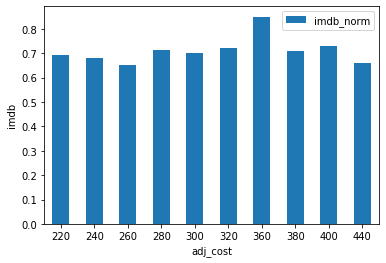

In [36]:
normalized_temp3.plot.bar(x = 'adj_cost_grouped', y = 'imdb_norm', rot=0)
pyplot.xlabel('adj_cost')
pyplot.ylabel('imdb')
pyplot.show()

This chart reflecting average budgets compared to Rotten Tomatoes scores shows that budgets at the higher end may in fact lead to a lower score:

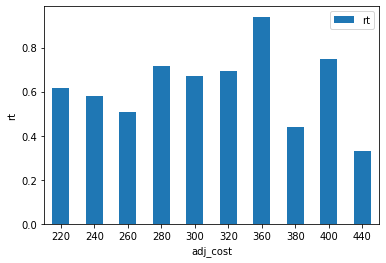

In [37]:
normalized_temp3.plot.bar(x = 'adj_cost_grouped', y = 'rt', rot=0)
pyplot.xlabel('adj_cost')
pyplot.ylabel('rt')
pyplot.show()